# EDA For BFP & Petrol Price

#### 1. Load & Understand our data

In [1]:
import pandas as pd 

dataset = pd.read_excel('dataset_1.xlsx', sheet_name='Pandas_Dec_2')
dataset['Oil_Rand'] = (dataset.Crude_Oil * dataset.ZAR_USD) / 100
dataset.head()

,Date,BFP,Levies,W&Retail_Cost,Total_Price,Crude_Oil,ZAR_USD,Oil_Rand
0,2011-01-01,453.949,253.65,165.201,858,91.45,683.30,624.877850
1,2011-02-01,479.949,253.65,165.201,899,96.52,691.19,667.136588
2,2011-03-01,522.949,253.65,165.201,942,103.72,720.32,747.115904
3,2011-04-01,552.149,271.65,172.601,996,114.64,693.51,795.039864
4,2011-05-01,581.149,271.65,172.601,1025,123.26,674.10,830.895660


In [2]:
dataset.shape

(134, 8)

In [3]:
dataset.columns

Index(['Date', 'BFP', 'Levies', 'W&Retail_Cost', 'Total_Price', 'Crude_Oil',
       'ZAR_USD', 'Oil_Rand'],
      dtype='object')

In [4]:
dataset.describe()

,BFP,Levies,W&Retail_Cost,Total_Price,Crude_Oil,ZAR_USD,Oil_Rand
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,655.728627,447.725149,273.113664,1375.805970,75.546716,1232.627683,862.273504
std,121.047802,123.311946,62.527165,230.111822,27.340720,294.850733,191.132703
min,274.770000,253.650000,165.201000,858.000000,18.380000,674.100000,341.555540
25%,566.545000,338.010000,219.500000,1237.500000,53.627500,1005.417500,715.141020
50%,648.620000,453.330000,268.100000,1354.000000,67.920000,1319.000000,877.379464
75%,736.605000,566.250000,325.700000,1515.750000,107.690000,1453.057500,987.902406
max,973.970000,669.190000,387.840000,2029.000000,125.450000,1858.300000,1349.370000


#### 2. Data Cleaning

Check for any null values

In [5]:
dataset.isnull().sum()

Date             0
BFP              0
Levies           0
W&Retail_Cost    0
Total_Price      0
Crude_Oil        0
ZAR_USD          0
Oil_Rand         0
dtype: int64

Check for any duplicates

In [6]:
#returns the sum of duplicates
dataset.duplicated().sum()

0

#### 3. Data Visualization

In [7]:
import plotly.express as px

fig = px.histogram(dataset, x="BFP" , nbins=10, title="Label", width=800, height=400)
fig.show()

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot


# chart 1
chart1 = go.Histogram(x=dataset.Oil_Rand)

# chart 2
chart2 = go.Histogram(x=dataset.BFP)

#chart 3
chart3 = go.Histogram(x=dataset.Total_Price)


fig = make_subplots(rows=1, cols=3, subplot_titles=("Oil Price(Rand): Feature", "BFP : Label A", "Petrol Price : Label B"))
fig.append_trace(chart1, 1, 1)
fig.append_trace(chart2, 1, 2)
fig.append_trace(chart3, 1, 3)
fig['layout'].update(height=600, width=1000,
					title='subplot')
iplot(fig)


<AxesSubplot:ylabel='Total_Price'>

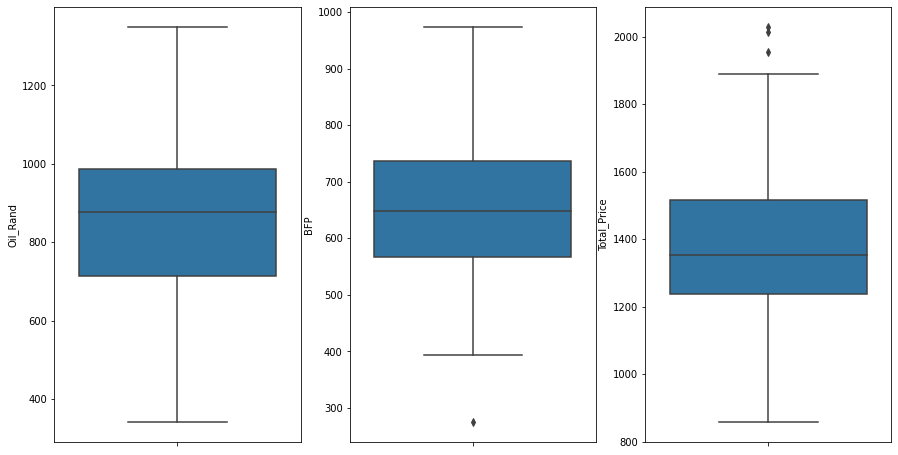

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(15,8))

#create chart in each subplot
sns.boxplot(data=dataset, y='Oil_Rand', ax=axes[0])
sns.boxplot(data=dataset, y='BFP', ax=axes[1])
sns.boxplot(data=dataset, y='Total_Price', ax=axes[2])

<AxesSubplot:xlabel='Total_Price', ylabel='Count'>

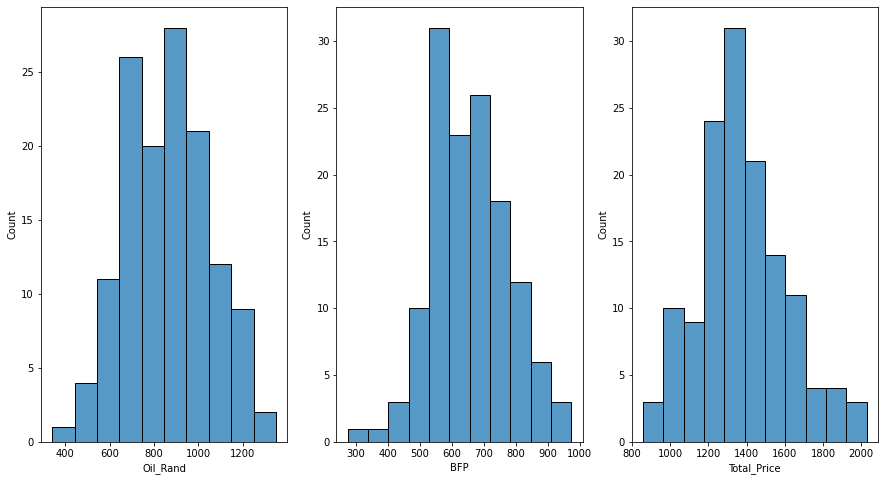

In [10]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(15,8))

#create chart in each subplot
sns.histplot(data=dataset, x='Oil_Rand', ax=axes[0])
sns.histplot(data=dataset, x='BFP', ax=axes[1])
sns.histplot(data=dataset, x='Total_Price', ax=axes[2])

Graph compilation

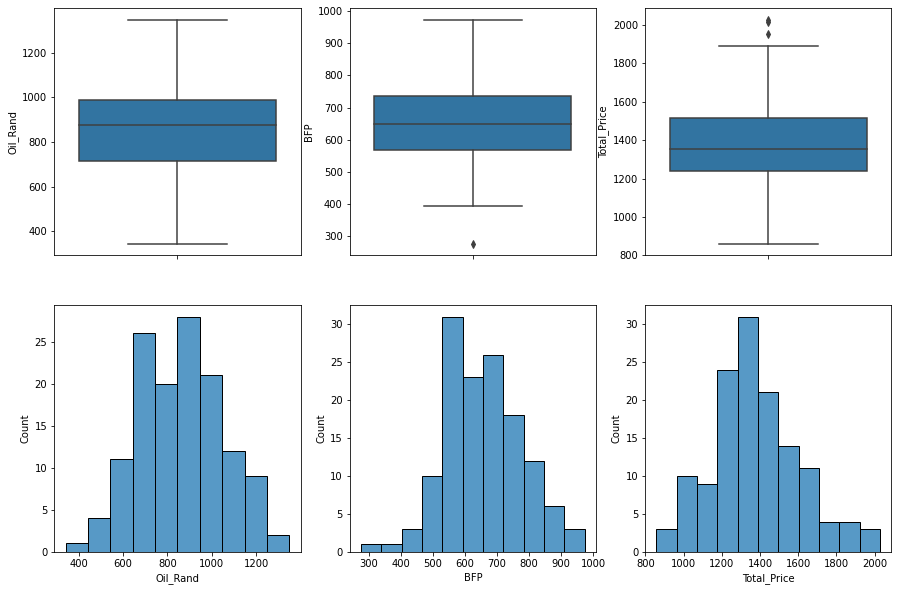

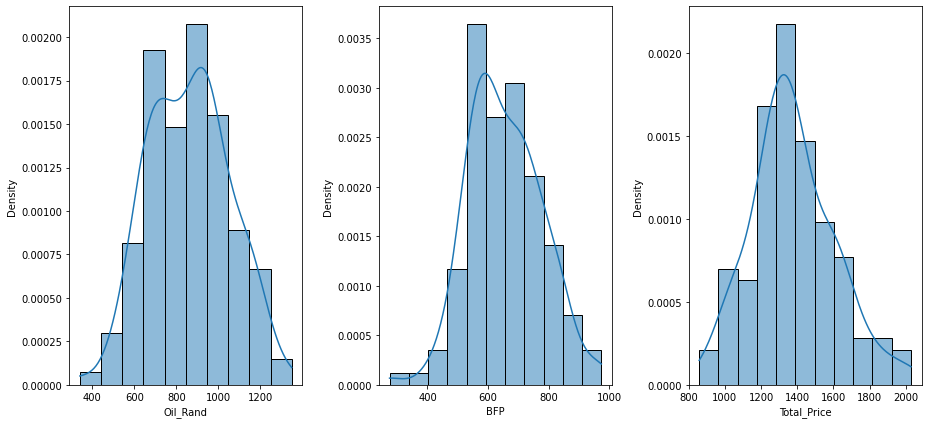

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 3, figsize=(15,10))

#create chart in each subplot in row 1
sns.boxplot(data=dataset, y='Oil_Rand', ax=axes[0,0])
sns.boxplot(data=dataset, y='BFP', ax=axes[0,1])
sns.boxplot(data=dataset, y='Total_Price', ax=axes[0,2])


#create chart in each subplot in row 2
sns.histplot(data=dataset, x='Oil_Rand', ax=axes[1,0])
sns.histplot(data=dataset, x='BFP', ax=axes[1,1])
sns.histplot(data=dataset, x='Total_Price', ax=axes[1,2])


#Create another graph for the distribution

cols = ['Oil_Rand', 'BFP', 'Total_Price']

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(13,6))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


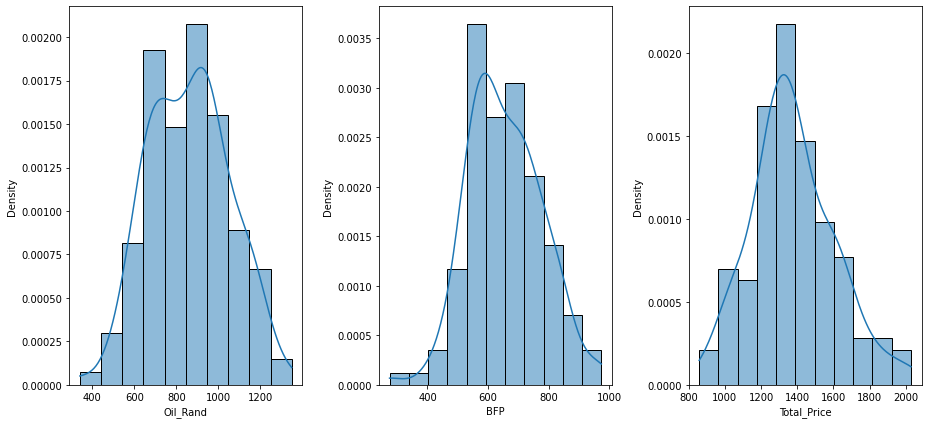

In [12]:
# select the columns to be plotted
cols = ['Oil_Rand', 'BFP', 'Total_Price']

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(13,6))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


#### 4. Detect and remove outliers

<AxesSubplot:ylabel='BFP'>

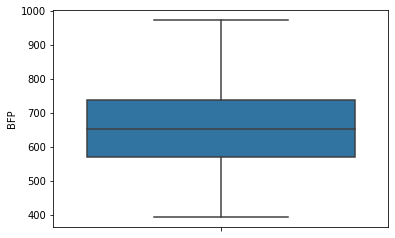

In [13]:
# Remove the outlier which is less that 350 
dataset = dataset.loc[(dataset['BFP'] > 350)]
sns.boxplot(data=dataset, y='BFP')

#### 5. Relationship Analysis : Scatter Plots

Text(0.5, 1.0, 'Oil Price(Rand) vs Petrol Price')

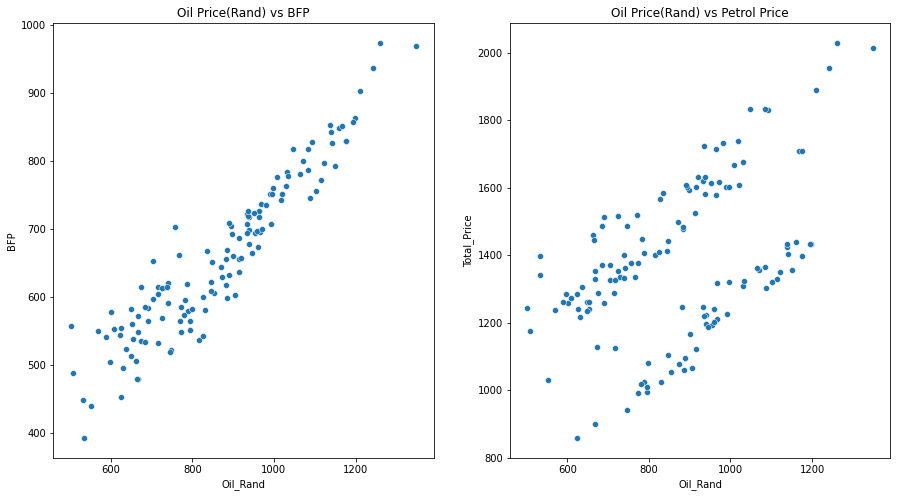

In [14]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 2, figsize=(15,8))

#create chart in each subplot
sns.scatterplot(data=dataset, x='Oil_Rand',y='BFP', ax=axes[0])
axes[0].set_title('Oil Price(Rand) vs BFP')


sns.scatterplot(data=dataset, x='Oil_Rand', y='Total_Price', ax=axes[1])
axes[1].set_title('Oil Price(Rand) vs Petrol Price')


Text(0.5, 1.0, 'W&Retail_Cost vs Petrol Price')

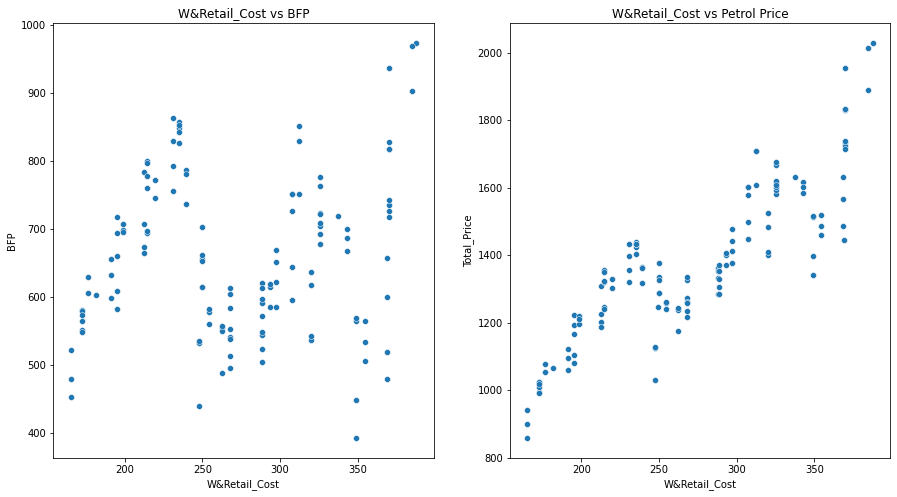

In [15]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 2, figsize=(15,8))

#create chart in each subplot
sns.scatterplot(data=dataset, x='W&Retail_Cost',y='BFP', ax=axes[0])
axes[0].set_title('W&Retail_Cost vs BFP')


sns.scatterplot(data=dataset, x='W&Retail_Cost', y='Total_Price', ax=axes[1])
axes[1].set_title('W&Retail_Cost vs Petrol Price')


#### 6. Descriptive statistics and data distribution

In [16]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


Minimum:392.77
Mean:658.59
Median:652.17
Mode:615.65
Maximum:973.97

Minimum:858.00
Mean:1376.96
Median:1354.00
Mode:1603.00
Maximum:2029.00



C:\Users\PC\AppData\Local\Temp/ipykernel_16328/3792750813.py:40: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\PC\AppData\Local\Temp/ipykernel_16328/3792750813.py:40: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



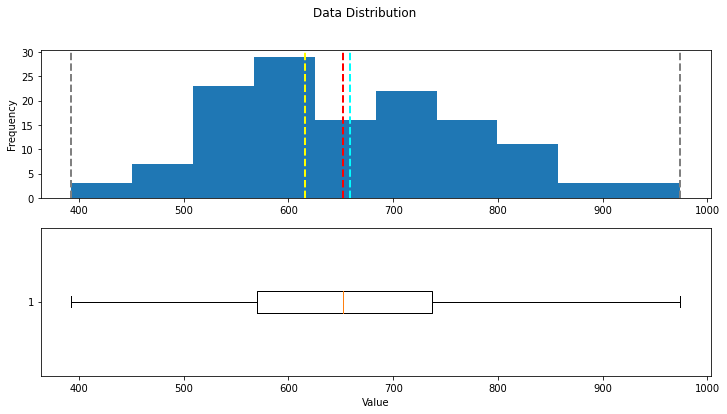

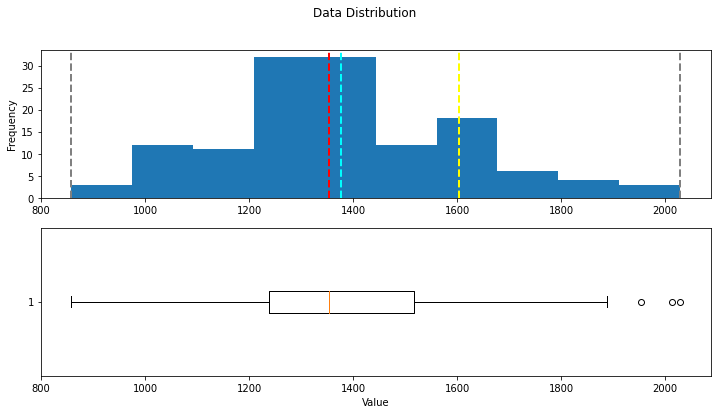

In [17]:
# Get the variable to examine
col = dataset['BFP']
# Call the function
show_distribution(col)


colB = dataset['Total_Price']
# Call the function
show_distribution(colB)

In [18]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

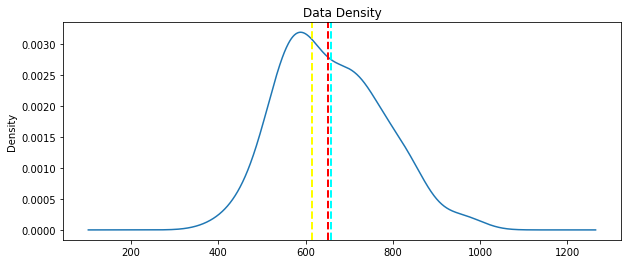

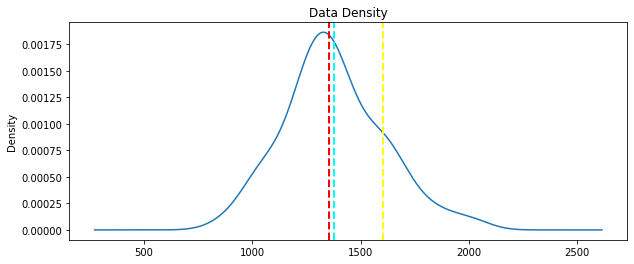

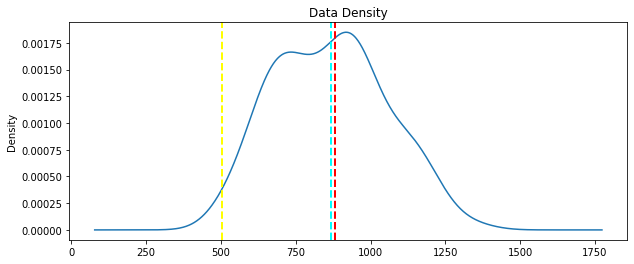

In [19]:
# Get the density of Grade
col = dataset['BFP']
col1 = dataset['Total_Price']
col2 = dataset['Oil_Rand']
show_density(col)
show_density(col1)
show_density(col2)

#### 7. Relationship Analysis : Corrolation

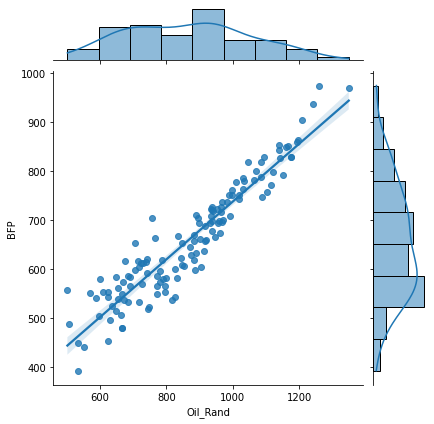

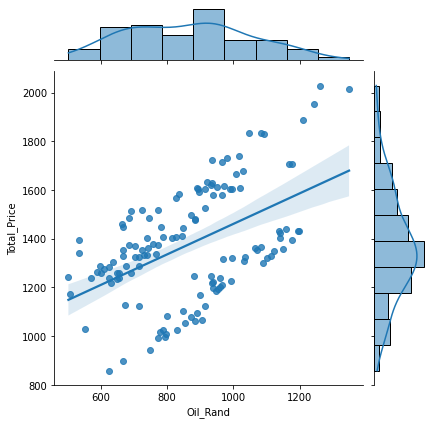

In [20]:
# Show a graph of the result

sns.jointplot(data = dataset, x="Oil_Rand", y="BFP", kind="reg", ax=axes[0])

sns.jointplot(data = dataset, x="Oil_Rand", y="Total_Price", kind="reg", ax=axes[0])


In [21]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='Crude_Oil', y='ZAR_USD', z='BFP', color='BFP')
fig.show()

Check corelation between the selected features and the label

<AxesSubplot:>

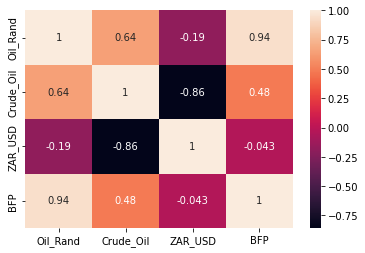

In [22]:
df = dataset[['Oil_Rand', 'Crude_Oil', 'ZAR_USD', 'BFP']]

corelation = df.corr()
#Create the graph
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

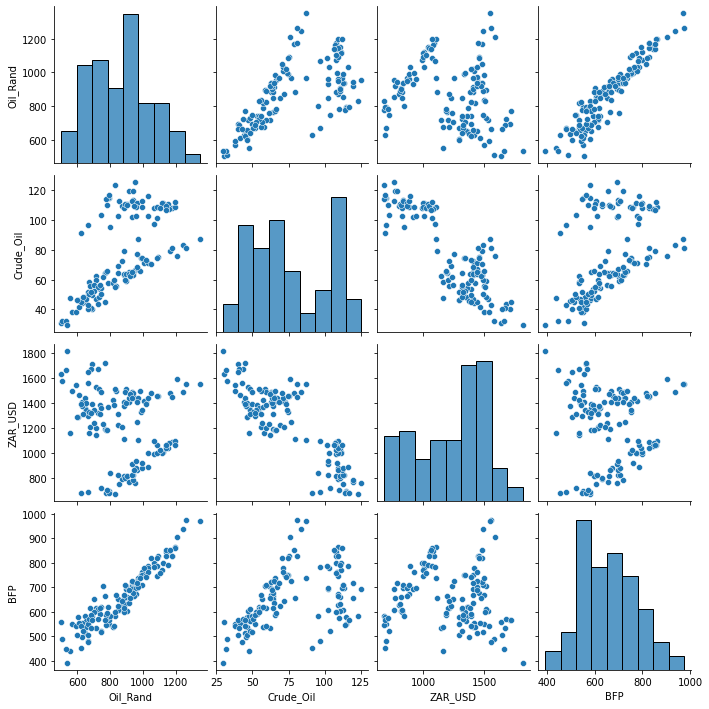

In [23]:
sns.pairplot(df)